## 本测试，用于预测海尔洗衣机XQB90线下销量数据，使用Prophet时间序列预测模型


In [17]:
from fbprophet import Prophet
import pandas as pd
import matplotlib as plt
import numpy as np
import plotly.express as px

In [12]:
df = pd.read_excel('HaierOFFLINE_1.xlsx')            #时间类型转换
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d')
df

,ds,y
0,2018-02-05,10
1,2018-02-12,39
2,2018-02-19,62
3,2018-02-26,68
4,2018-03-05,434
...,...,...
205,2022-01-10,689
206,2022-01-17,656
207,2022-01-24,575
208,2022-01-31,282


In [9]:
# df['y'] = np.log(df['y'])             数据做log处理
# df

,ds,y
0,2018-02-05,0.834032
1,2018-02-12,1.298436
2,2018-02-19,1.417583
3,2018-02-26,1.439718
4,2018-03-05,1.803860
...,...,...
205,2022-01-10,1.877209
206,2022-01-17,1.869671
207,2022-01-24,1.849143
208,2022-01-31,1.730222


In [18]:
Seriesfig = px.line(df, x="ds", y="y")
Seriesfig.show()

In [56]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.changepoint_range=0.9          # changepoint_range 寻找突变点，0.9即在前90%处寻找潜在的变化点
model.changepoint_prior_scale=0.9   #changepoint_prior_scale 来调整稀疏先验的程度 增加减少这个值，会导致趋势拟合得灵活或稀疏
model.add_country_holidays(country_name="CN")
model.fit(df)
future = model.make_future_dataframe(periods=180)      #periods参数，freq=Days 当前即180天，更改该参数
                                                       #可以查看预测最多365天的数值
forecast = model.predict(future)

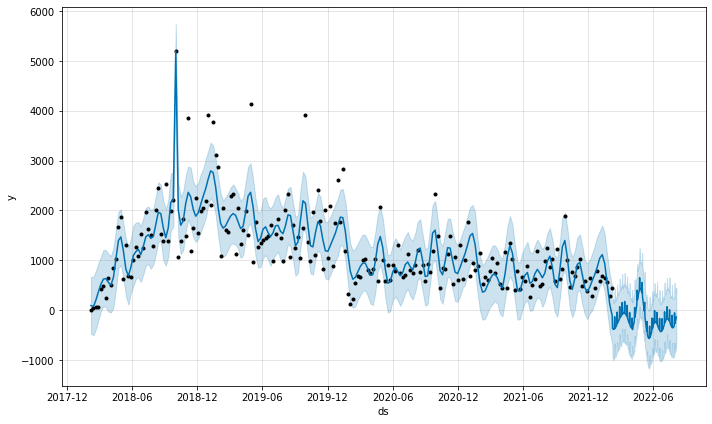

In [57]:
fig1 = model.plot(forecast)
fig1.savefig('temp1.png')

## 黑色点为预测点，蓝色序列线为原始数据值
### （用全部数据预测下一期数据效果良好）       

In [58]:
train_len = len(df["y"])          #均方误差，计算预测效果
rmse = np.sqrt(sum((df["y"] - forecast["yhat"].head(train_len)) ** 2) / train_len)
print('RMSE in forecasts = {}'.format(round(rmse, 2)))

RMSE in forecasts = 445.88


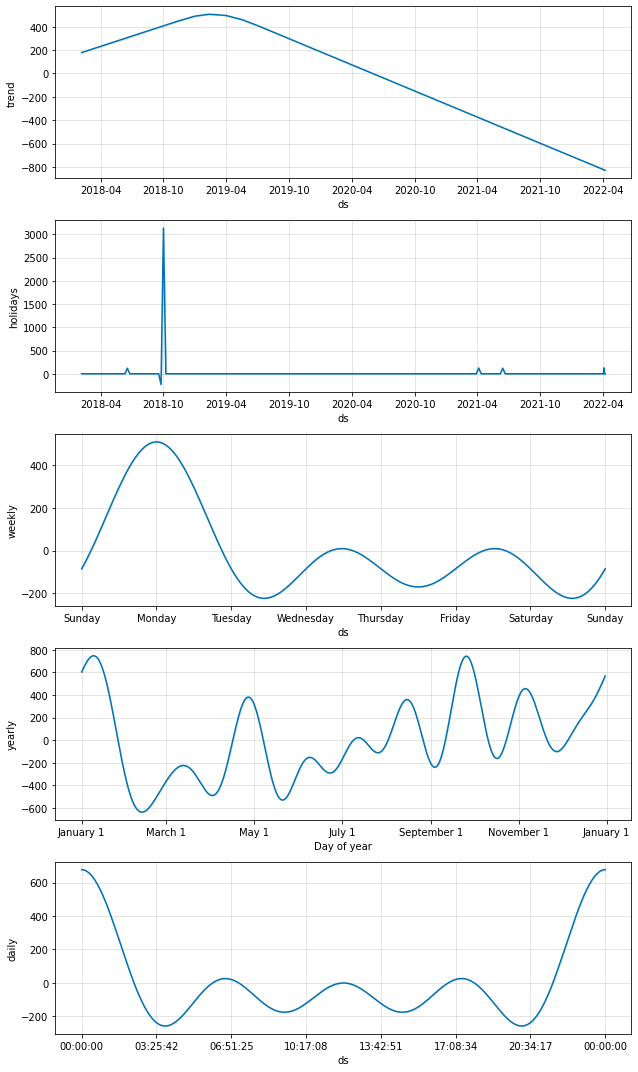

In [28]:
fig2 = model.plot_components(forecast)
fig2.savefig('temp2.png')